# Connected Component Labelling

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [56]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [57]:
image=cv2.imread("Images/license_plate.png")

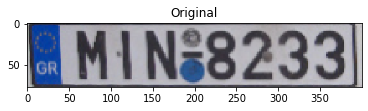

In [58]:
plt_imshow("Original",image)

In [59]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [60]:
(T,thresholded)=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

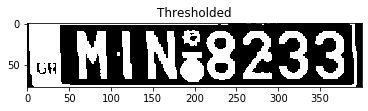

In [61]:
plt_imshow("Thresholded", thresholded)

In [65]:
# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
    thresholded, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

[INFO] examining component 1/17 (background)


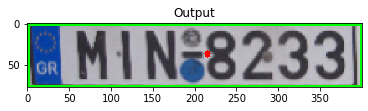

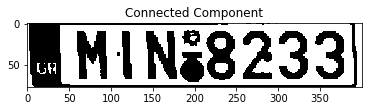

[INFO] examining component 2/17


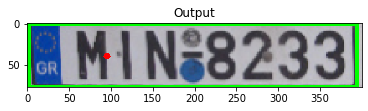

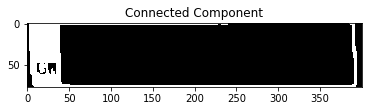

[INFO] examining component 3/17


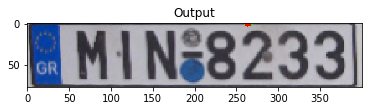

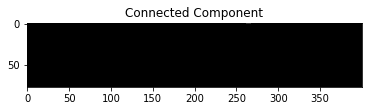

[INFO] examining component 4/17


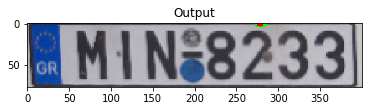

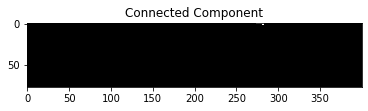

[INFO] examining component 5/17


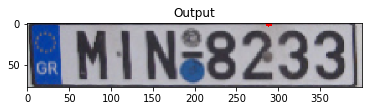

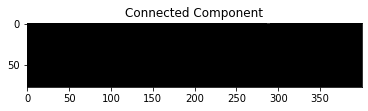

[INFO] examining component 6/17


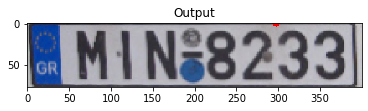

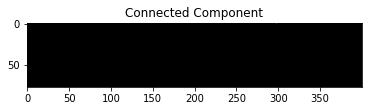

[INFO] examining component 7/17


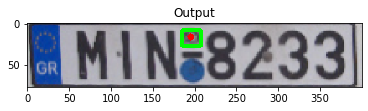

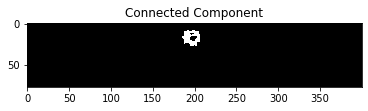

[INFO] examining component 8/17


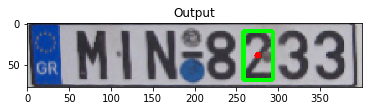

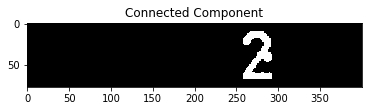

[INFO] examining component 9/17


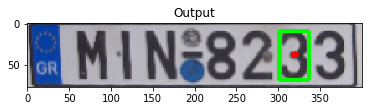

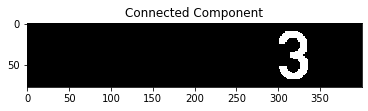

[INFO] examining component 10/17


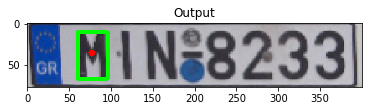

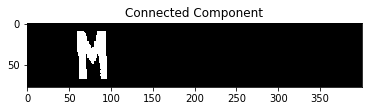

[INFO] examining component 11/17


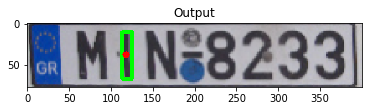

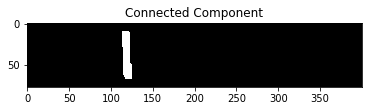

[INFO] examining component 12/17


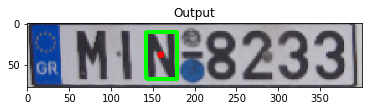

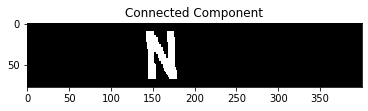

[INFO] examining component 13/17


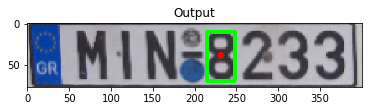

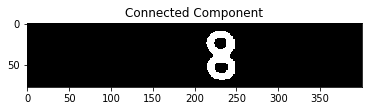

[INFO] examining component 14/17


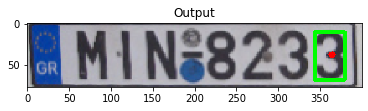

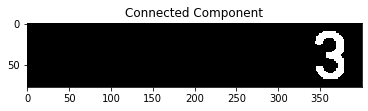

[INFO] examining component 15/17


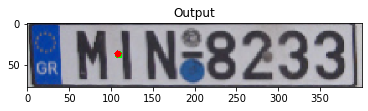

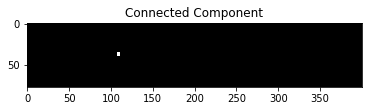

[INFO] examining component 16/17


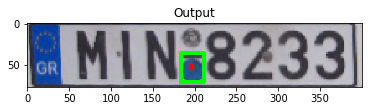

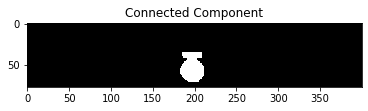

[INFO] examining component 17/17


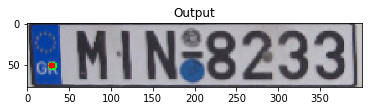

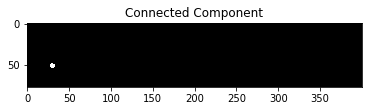

In [83]:
# loop over the number of unique connected component labels
for i in range(0, numLabels):
    # if this is the first component then we examining the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)

    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)

    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))

    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    # clone our original image (so we can draw on it) and then draw
    # a bounding box surrounding the connected component along with
    # a circle corresponding to the centroid
    output = image.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

    # construct a mask for the current connected component by
    # finding a pixels in the labels array that have the current
    # connected component ID
    componentMask = (labels == i).astype("uint8") * 255

    # show our output image and connected component mask
    plt_imshow("Output", output)
    plt_imshow("Connected Component", componentMask)
#     time.sleep(2)

In [84]:

# initialize an output mask to store all characters parsed from
# the license plate
mask = np.zeros(gray.shape, dtype="uint8")

[INFO] keeping connected component 7
[INFO] keeping connected component 8
[INFO] keeping connected component 9
[INFO] keeping connected component 10
[INFO] keeping connected component 11
[INFO] keeping connected component 12
[INFO] keeping connected component 13


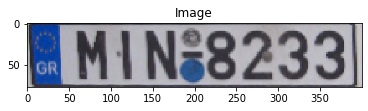

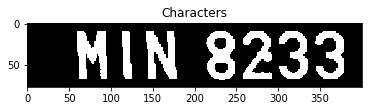

In [85]:
# loop over the number of unique connected component labels, skipping
# over the first label (as label zero is the background)
for i in range(1, numLabels):
	# extract the connected component statistics for the current
	# label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]

	# ensure the width, height, and area are all neither too small
	# nor too big
	keepWidth = w > 5 and w < 50
	keepHeight = h > 45 and h < 65
	keepArea = area > 500 and area < 1500

	# ensure the connected component we are examining passes all
	# three tests
	if all((keepWidth, keepHeight, keepArea)):
		# construct a mask for the current connected component and
		# then take the bitwise OR with the mask
		print("[INFO] keeping connected component {}".format(i))
		componentMask = (labels == i).astype("uint8") * 255
		mask = cv2.bitwise_or(mask, componentMask)

# show the original input image and the mask for the license plate
# characters
plt_imshow("Image", image)
plt_imshow("Characters", mask)

## Try in Pokemon Image

This is one of the interview question when I had coding interview in Inventec. You need to separate two component in a pokemon image

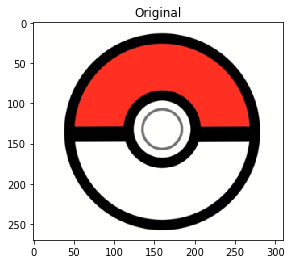

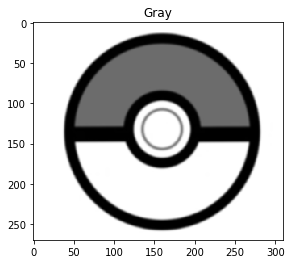

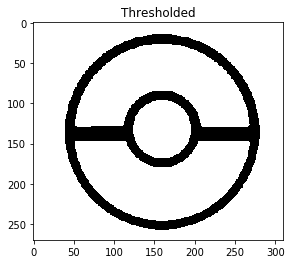

In [121]:
image=cv2.imread("Images/pokemon.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gaussian=cv2.GaussianBlur(gray,(5,5),-1)
thresholded=cv2.threshold(gaussian,55,255,cv2.THRESH_BINARY)[1]

plt_imshow("Original",image)
plt_imshow("Gray",gaussian)
plt_imshow("Thresholded",thresholded)


In [122]:
# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
    thresholded, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output



[INFO] examining component 1/5 (background)
Width is 241 and height is 242
Area is 13571


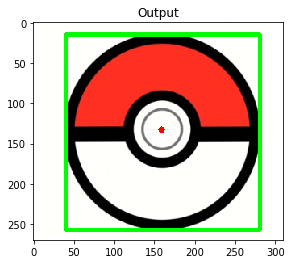

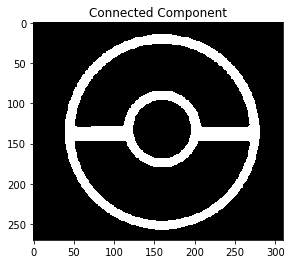

[INFO] examining component 2/5
Width is 310 and height is 270
Area is 37877


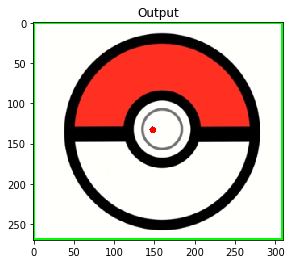

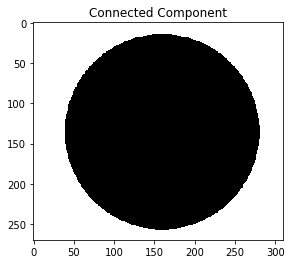

[INFO] examining component 3/5
Width is 217 and height is 103
Area is 13943


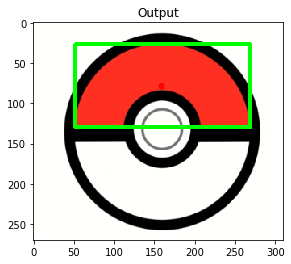

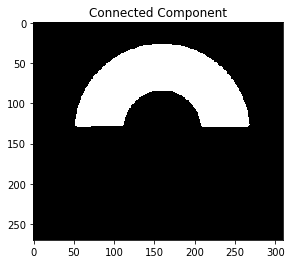

[INFO] examining component 4/5
Width is 72 and height is 72
Area is 4101


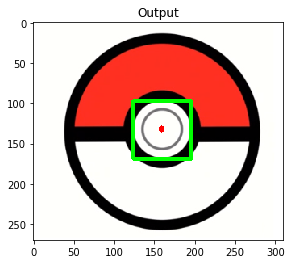

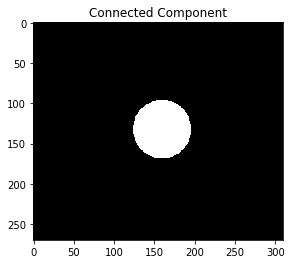

[INFO] examining component 5/5
Width is 217 and height is 99
Area is 14208


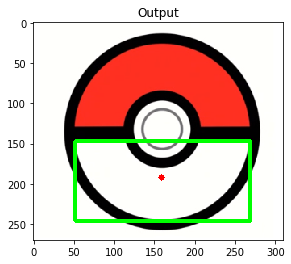

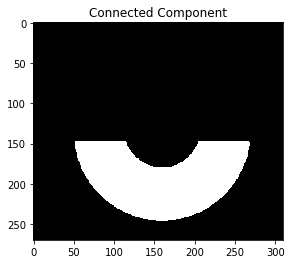

In [124]:
# loop over the number of unique connected component labels
for i in range(0, numLabels):
    # if this is the first component then we examining the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)

    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)

    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))

    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    print("Width is {} and height is {}".format(w,h))
    print("Area is {}".format(area))

    # clone our original image (so we can draw on it) and then draw
    # a bounding box surrounding the connected component along with
    # a circle corresponding to the centroid
    output = image.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

    # construct a mask for the current connected component by
    # finding a pixels in the labels array that have the current
    # connected component ID
    componentMask = (labels == i).astype("uint8") * 255

    # show our output image and connected component mask
    plt_imshow("Output", output)
    plt_imshow("Connected Component", componentMask)
#     time.sleep(2)

[INFO] examining component 1/5 (background)
[INFO] examining component 2/5
[INFO] examining component 3/5
Width is 217 and height is 103


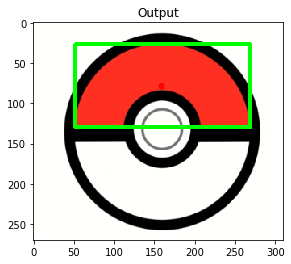

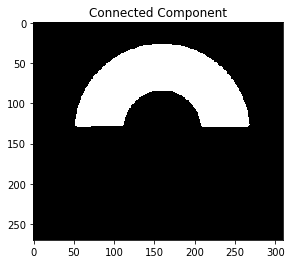

[INFO] examining component 4/5
[INFO] examining component 5/5
Width is 217 and height is 99


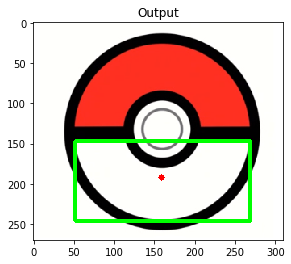

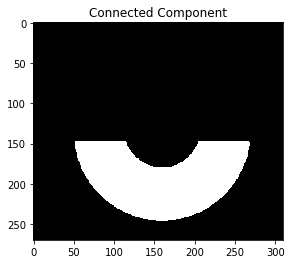

In [127]:
# loop over the number of unique connected component labels

mask_list=[]
for i in range(0, numLabels):
    # if this is the first component then we examining the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)

    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)

    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))

    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    keepWidth=w>200 and w<300
    keepHeight=h>80 and h<150
    keepArea=area>11000 and area<15000
    
    if(keepArea and keepHeight and keepWidth):
        print("Width is {} and height is {}".format(w,h))
        # clone our original image (so we can draw on it) and then draw
        # a bounding box surrounding the connected component along with
        # a circle corresponding to the centroid
        output = image.copy()
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
        cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

        # construct a mask for the current connected component by
        # finding a pixels in the labels array that have the current
        # connected component ID
        componentMask = (labels == i).astype("uint8") * 255

        # show our output image and connected component mask
        plt_imshow("Output", output)
        plt_imshow("Connected Component", componentMask)
        mask_list.append(componentMask)


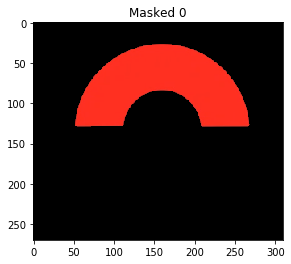

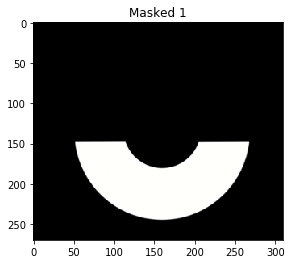

In [129]:
for i,a in enumerate(mask_list):
    masked=cv2.bitwise_and(image,image,mask=a)
    plt_imshow("Masked {}".format(i),masked)